                      Tatiana Weaver | Code Fellows | November 18, 2016
# 2016 New Coder Survey: Data Analysis and Visualization
* A survey of 15,000+ people who are actively learning to code
* Surveyed by Free Code Camp and CodeNewbie.org
* Data source: kaggle.com

### Motivation
* Being a new coder myself, I was interested in demographics of the people who took the survey

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as a_s
from sklearn.model_selection import KFold
data = pd.read_csv("2016-FCC-New-Coders-Survey-Data.csv", low_memory=False)

## Initial Cleaning and Processing

* Columns in the dataset

In [2]:
print(data.columns[:55], data.columns[55:])
print('total number of columns:', len(data.columns))

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampFullJobAfter',
       'BootcampLoanYesNo', 'BootcampMonthsAgo', 'BootcampName',
       'BootcampPostSalary', 'BootcampRecommend', 'ChildrenNumber',
       'CityPopulation', 'CodeEventBootcamp', 'CodeEventCoffee',
       'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventGameJam',
       'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup',
       'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther',
       'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd',
       'CodeEventWomenCode', 'CodeEventWorkshop', 'CommuteTime',
       'CountryCitizen', 'CountryLive', 'EmploymentField',
       'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther',
       'ExpectedEarning', 'FinanciallySupporting', 'Gender', 'HasChildren',
       'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet',
       'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt',
       'HomeMortgageOwe', 'Hou

In [102]:
data_gender = data.Gender.dropna()
data_age_gen_country = data[["Age", "Gender", "CountryLive"]].dropna()
data_inc_gen_country = data[["Income", "Gender", "CountryLive"]].dropna()
data_female_country = data[["Gender", "CountryLive"]].dropna()
data_bc_gender = data[["Gender", "AttendedBootcamp"]].dropna()

## Exploratory Analysis

### Participants demographics

In [60]:
####################
# Gender distribution in general
total_num1 = data_gender.count()
female = data_gender[data_gender == "female"].count() * 100 / total_num1
male = data_gender[data_gender == "male"].count() * 100 / total_num1
other = 100 - female - male
print("Gender:")
print("Female: {}%".format(round(female, 1)))
print("Male: {}%".format(round(male, 1)))
print("Other: {}%".format(round(other, 1)))

####################
# Female vs Male by country
data_gender_usa = data_gender_country[data_gender_country.CountryLive == "United States of America"]
data_gender_other = data_gender_country[data_gender_country.CountryLive != "United States of America"]

fem_usa = data_gender_usa[data_gender_usa.Gender == "female"]
fem_other = data_gender_other[data_gender_other.Gender == "female"]

female_usa = len(fem_usa) * 100 / len(data_gender_usa)
female_other = len(fem_other) * 100 / len(data_gender_other)
print()
print("Percent of women vs. men who is actively learning how to code:")
print("USA: {}%".format(round(female_usa, 1)))
print("The rest of the world: {}%".format(round(female_other, 1)))

####################
# Bootcamp attendance for men vs women
fem_bc_all = data_bc_gender[data_bc_gender.Gender == "female"]
male_bc_all = data_bc_gender[data_bc_gender.Gender == "male"]

fem_bc = 100 * len(fem_bc_all[fem_bc_all.AttendedBootcamp == 1.]) / len(fem_bc_all)
male_bc = 100 * len(male_bc_all[male_bc_all.AttendedBootcamp == 1.]) / len(male_bc_all)
print()
print("Bootcamp attendance men vs. women who is actively learning how to code:")
print("{}% of female participants attended a bootcamp".format(round(fem_bc, 1)))
print("{}% of male participants attended a bootcamp".format(round(male_bc, 1)))

Gender:
Female: 20.7%
Male: 78.3%
Other: 1.0%

Percent of women vs. men who is actively learning how to code:
USA: 28.5%
The rest of the world: 13.9%

Bootcamp attendance men vs. women who is actively learning how to code:
11.6% of female participants attended a bootcamp
4.6% of male participants attended a bootcamp


### Is there a difference in age and income distribition for men and women between USA and the rest of the world?


Age by gender: USA vs the rest of the world
------------------------------------------------
  Country  Avg W age, yr  Std  Avg M age, yr  Std, yr  Diff, yr  t-st   p-val
0     USA           32.3  9.6           31.0      9.6       1.3  -4.7  0.0000
1   Other           28.1  8.1           27.4      8.0       0.7  -2.5  0.0122



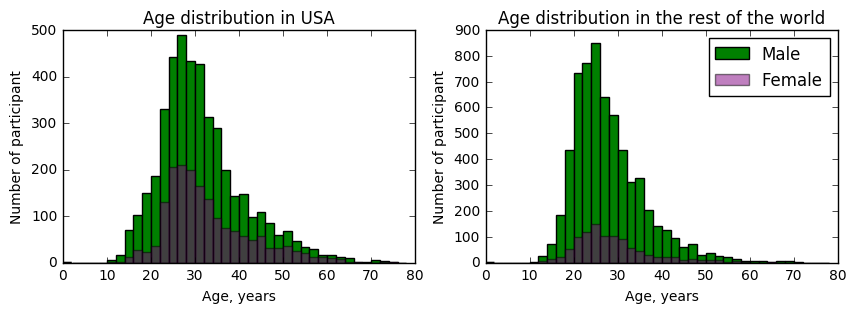


Income by gender: USA vs the rest of the world
------------------------------------------------
  Country  Avg W inc, $   Std, $  Avg M inc, $   Std, $  Diff, $  t-st   p-val
0     USA       46711.9  29646.7       55532.3  37649.3   8820.4   7.5  0.0000
1   Other       34122.7  28414.1       36123.9  33622.4   2001.2   1.3  0.1897



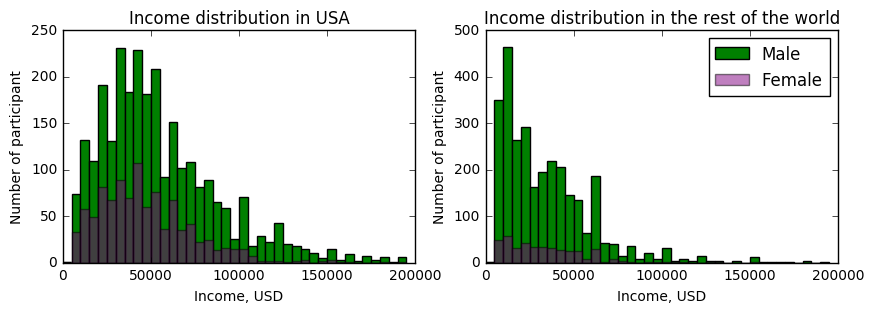

In [112]:
# Investigate difference in age between men and women, USA vs the rest of the world

# Data <Gender, Age, Country>: split to USA and Other countries
data_age_gender_usa = data_age_gen_country[data_age_gen_country.CountryLive == "United States of America"]
data_age_gender_other = data_age_gen_country[data_age_gen_country.CountryLive != "United States of America"]

# For USA Age data: split to female and male data
data_male_age_usa = data_age_gender_usa[data_age_gender_usa.Gender == 'male'].Age
data_fem_age_usa = data_age_gender_usa[data_age_gender_usa.Gender == 'female'].Age

# For Other countries Age data: split to female and male data
data_male_age_other = data_age_gender_other[data_age_gender_other.Gender == 'male'].Age
data_fem_age_other = data_age_gender_other[data_age_gender_other.Gender == 'female'].Age

# USA: Avg age  and std.dev by gender
women_age_avg_usa = data_fem_age_usa.mean()
men_age_avg_usa = data_male_age_usa.mean()
difference_age_usa = women_age_avg_usa - men_age_avg_usa

women_age_std_usa = data_fem_age_usa.std()
men_age_std_usa = data_male_age_usa.std()

tstat_usa, pval_usa = ttest_ind(data_male_age_usa, data_fem_age_usa, equal_var=False)

# Other countries: Avg age and std.dev by gender
women_age_avg_other = data_fem_age_other.mean()
men_age_avg_other = data_male_age_other.mean()
difference_age_other = women_age_avg_other - men_age_avg_other

women_age_std_other = data_fem_age_other.std()
men_age_std_other = data_male_age_other.std()

tstat_other, pval_other = ttest_ind(data_male_age_other, data_fem_age_other, equal_var=False)


# DF that holds all the calculated results
age_country_stats = pd.DataFrame(
[
        ["USA",
         round(women_age_avg_usa, 1),
         round(women_age_std_usa, 1),
         round(men_age_avg_usa, 1),
         round(men_age_std_usa, 1),
         round(difference_age_usa, 1),
         round(tstat_usa, 1),
         round(pval_usa, 4)
        ],
        ["Other",
         round(women_age_avg_other, 1),
         round(women_age_std_other, 1),
         round(men_age_avg_other, 1),
         round(men_age_std_other, 1),
         round(difference_age_other, 1),
         round(tstat_other, 1),
         round(pval_other, 4)
        ]
],
        columns=["Country",
                 "Avg W age, yr",
                 "Std",
                 "Avg M age, yr",
                 "Std, yr",
                 "Diff, yr",
                 "t-st",
                 "p-val"
                 ]
)

print()
print("Age by gender: USA vs the rest of the world")
print("------------------------------------------------")
print(age_country_stats)
print()

# Visualize Age distribution for men and women

bins=np.arange(0, 80, 2)
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(data_male_age_usa, color='green', bins=bins, label="Male")
ax1.hist(data_fem_age_usa, color='purple', alpha = 0.5, bins=bins, label="Female")
ax1.set_title("Age distribution in USA")
ax1.set_xlabel("Age, years")
ax1.set_ylabel("Number of participant")

ax2 = plt.subplot(1, 2, 2)
ax2.hist(data_male_age_other, color='green', bins=bins, label="Male")
ax2.hist(data_fem_age_other, color='purple', alpha = 0.5, bins=bins, label="Female")
ax2.set_title("Age distribution in the rest of the world")
ax2.set_xlabel("Age, years")
ax2.set_ylabel("Number of participant")
plt.legend()

plt.show()

########################################################
# Investigate difference in income between men and women, USA vs other countries

# Data <Gender, Income Country>: split to USA and Other countries
data_inc_gender_usa = data_inc_gen_country[data_inc_gen_country.CountryLive == "United States of America"]
data_inc_gender_other = data_inc_gen_country[data_inc_gen_country.CountryLive != "United States of America"]


# For USA Income data: split to female and male data
data_male_inc_usa = data_inc_gender_usa[data_inc_gender_usa.Gender == 'male'].Income
data_fem_inc_usa = data_inc_gender_usa[data_inc_gender_usa.Gender == 'female'].Income

# For Other countries Income data: split to female and male data
data_male_inc_other = data_inc_gender_other[data_inc_gender_other.Gender == 'male'].Income
data_fem_inc_other = data_inc_gender_other[data_inc_gender_other.Gender == 'female'].Income

# USA: Avg Income and std.dev by gender
women_inc_avg_usa = data_fem_inc_usa.mean()
men_inc_avg_usa = data_male_inc_usa.mean()

difference_inc_usa = men_inc_avg_usa - women_inc_avg_usa

women_inc_std_usa = data_fem_inc_usa.std()
men_inc_std_usa = data_male_inc_usa.std()

tstat_usa, pval_usa = ttest_ind(data_male_inc_usa, data_fem_inc_usa, equal_var=False)

# Other countries: Avg Income and std.dev by gender
women_inc_avg_other = data_fem_inc_other.mean()
men_inc_avg_other = data_male_inc_other.mean()

difference_inc_other = men_inc_avg_other - women_inc_avg_other

women_inc_std_other = data_fem_inc_other.std()
men_inc_std_other = data_male_inc_other.std()

tstat_other, pval_other = ttest_ind(data_male_inc_other, data_fem_inc_other, equal_var=False)


# DF that holds all the calculated results
inc_country_stats = pd.DataFrame(
[
        ["USA",
         round(women_inc_avg_usa, 1),
         round(women_inc_std_usa, 1),
         round(men_inc_avg_usa, 1),
         round(men_inc_std_usa, 1),
         round(difference_inc_usa, 1),
         round(tstat_usa, 1),
         round(pval_usa, 4)
        ],
        ["Other",
         round(women_inc_avg_other, 1),
         round(women_inc_std_other, 1),
         round(men_inc_avg_other, 1),
         round(men_inc_std_other, 1),
         round(difference_inc_other, 1),
         round(tstat_other, 1),
         round(pval_other, 4)
        ]
],
        columns=["Country",
                 "Avg W inc, $",
                 "Std, $",
                 "Avg M inc, $",
                 "Std, $",
                 "Diff, $",
                 "t-st",
                 "p-val"
                 ]
)

print()
print("Income by gender: USA vs the rest of the world")
print("------------------------------------------------")
print(inc_country_stats)
print()

# Visualize Income distribution for men and women

bins=np.arange(0, 200000, 5000)
plt.figure(figsize=(10, 3))
ax1 = plt.subplot(1, 2, 1)
ax1.hist(data_male_inc_usa, color='green', bins=bins, label="Male")
ax1.hist(data_fem_inc_usa, color='purple', alpha = 0.5, bins=bins, label="Female")
ax1.set_title("Income distribution in USA")
ax1.set_xlabel("Income, USD")
ax1.set_ylabel("Number of participant")

ax2 = plt.subplot(1, 2, 2)
ax2.hist(data_male_inc_other, color='green', bins=bins, label="Male")
ax2.hist(data_fem_inc_other, color='purple', alpha = 0.5, bins=bins, label="Female")
ax2.set_title("Income distribution in the rest of the world")
ax2.set_xlabel("Income, USD")
ax2.set_ylabel("Number of participant")
plt.legend()

plt.show()


* There is a significant difference in age and income for men and women who are actively learning to code in USA, as well as in the rest of the world

## Reformatting and/or Rescaling Data

* Creating a new column "gender_num" which is based on the "Gender" column:
   * if "Gender" is "male" -> "gender_num" is '1'
   * if "Gender" is "female" -> "gender_num" is '0'
   * "gender_num" is 'nan' for other "Gender" values

In [ ]:
def gender_to_number(x):
    """Return '1' for 'male', '0' for 'female', 'nan' otherwise."""
    if x.Gender == 'male':
        return 1
    elif x.Gender == 'female':
        return 0

data["gender_num"] = [gender_to_number(data.loc[i]) for i in range(len(data))]

## Data Modeling